1- Practice the materials of the lecture
2- Using the amazon_tree_workshop.csv file, conduct the following:
3- find missing values and fix them
4-check the skewness of each column and fix them if there are any


 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

amazon_df = pd.read_csv('amazon_tree_tutorial.csv')

In [2]:
amazon_df = amazon_df.replace([' ',"*",'-'], np.nan)

In [3]:
amazon_df[amazon_df.isnull().any(axis=1)]

,Species,Leaf_Color,Trunk_Height,Trunk_Diameter,Leaf_Length,Leaf_Width
25,NaN,Brown,39.3,0.87,18.15,10.53
40,Diesel,Green,NaN,0.76,21.43,11.49
89,Spanish_Cedar,Brown,63.17,0.77,11.96,NaN
127,Spanish_Cedar,NaN,NaN,NaN,NaN,NaN
193,Spanish_Cedar,Brown,NaN,0.96,23.7,11.2
240,Spanish_Cedar,NaN,72.91,0.98,21.23,8.21
372,NaN,Brown,58.38,1.13,NaN,8.15


In [4]:
amazon_df = amazon_df.astype({
    'Species': 'category',
    'Leaf_Color': 'category', 
    'Trunk_Height': 'float64',
    'Trunk_Diameter': 'float64',
    'Leaf_Length': 'float64',
    'Leaf_Width': 'float64'
})

In [5]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Species         495 non-null    category
 1   Leaf_Color      495 non-null    category
 2   Trunk_Height    494 non-null    float64 
 3   Trunk_Diameter  496 non-null    float64 
 4   Leaf_Length     495 non-null    float64 
 5   Leaf_Width      495 non-null    float64 
dtypes: category(2), float64(4)
memory usage: 17.0 KB


In [16]:
amazon.isnull().sum()

Species           1
Leaf_Color        0
Trunk_Height      1
Trunk_Diameter    0
Leaf_Length       0
Leaf_Width        0
dtype: int64

In [6]:
amazon_df_clean = amazon_df.dropna()


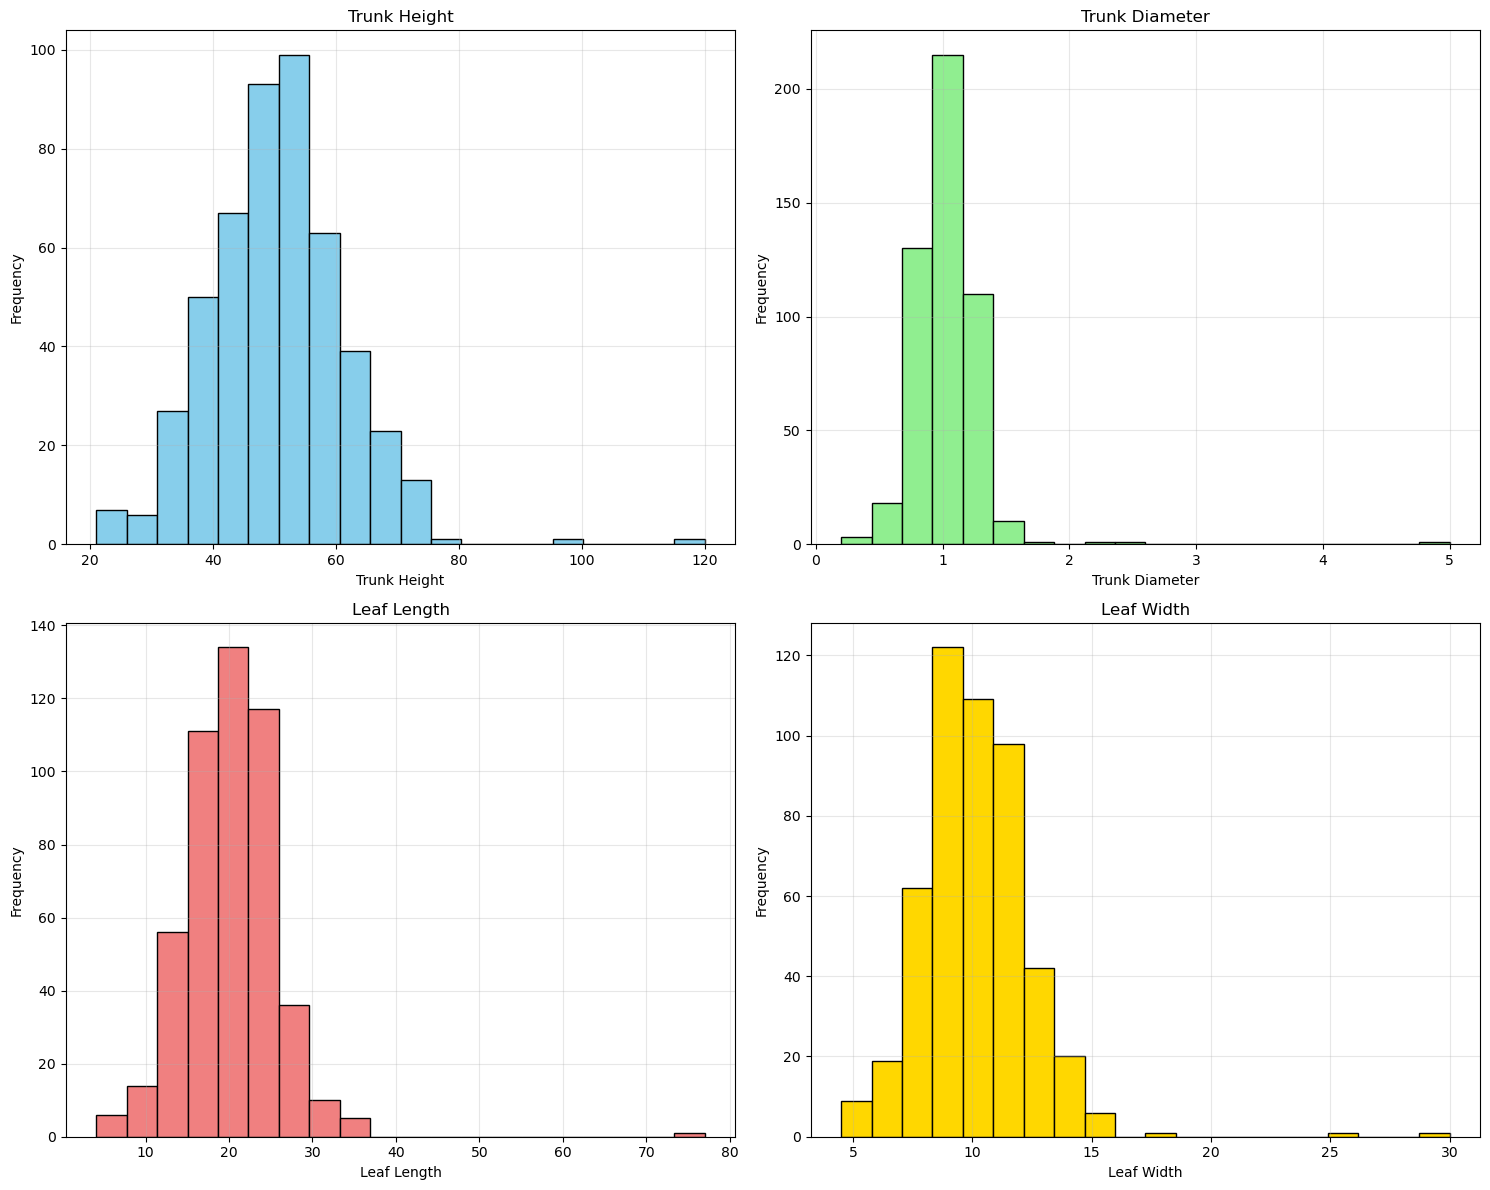

In [7]:
# Create 4 subplots using simple plt commands
plt.figure(figsize=(15, 12))

# Subplot 1: Trunk Height
plt.subplot(2, 2, 1)
plt.hist(amazon_df_clean['Trunk_Height'], bins=20, color='skyblue', edgecolor='black')
plt.title('Trunk Height')
plt.xlabel('Trunk Height')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Subplot 2: Trunk Diameter
plt.subplot(2, 2, 2)
plt.hist(amazon_df_clean['Trunk_Diameter'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Trunk Diameter')
plt.xlabel('Trunk Diameter')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Subplot 3: Leaf Length
plt.subplot(2, 2, 3)
plt.hist(amazon_df_clean['Leaf_Length'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Leaf Length')
plt.xlabel('Leaf Length')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Subplot 4: Leaf Width
plt.subplot(2, 2, 4)
plt.hist(amazon_df_clean['Leaf_Width'], bins=20, color='gold', edgecolor='black')
plt.title('Leaf Width')
plt.xlabel('Leaf Width')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [8]:
numeric_columns = ['Trunk_Height', 'Trunk_Diameter', 'Leaf_Length', 'Leaf_Width']

for col in numeric_columns:
    skewness = amazon_df_clean[col].skew()
    print(f"{col}: {skewness:.3f}")

Trunk_Height: 0.613
Trunk_Diameter: 6.042
Leaf_Length: 2.001
Leaf_Width: 1.918


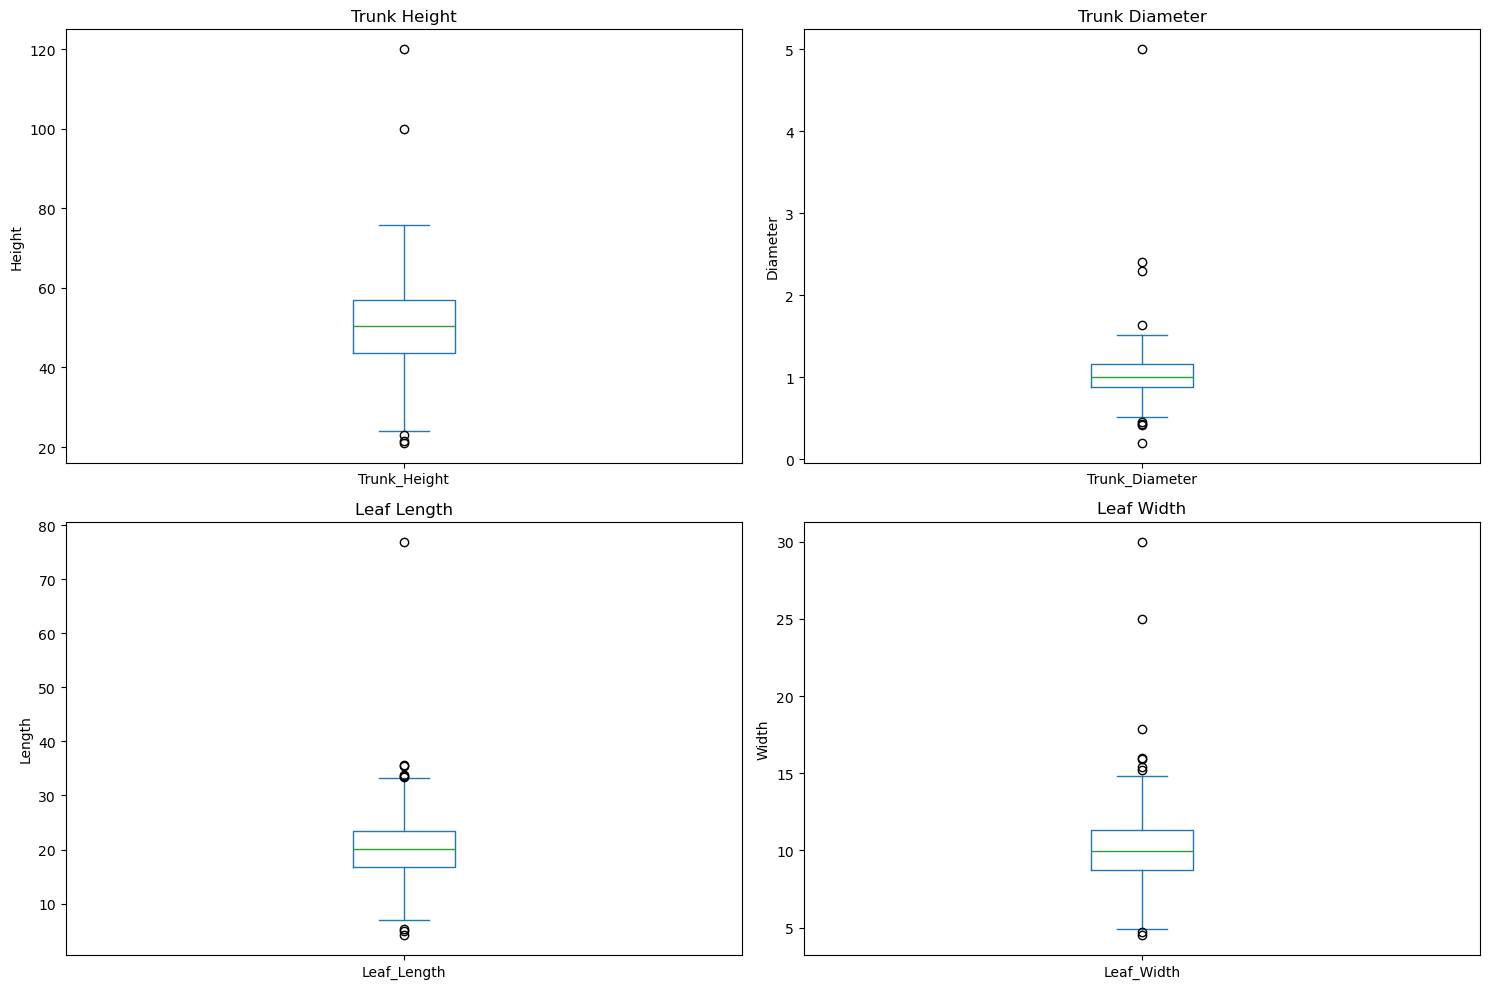

In [9]:
plt.figure(figsize=(15, 10))

# Trunk Height
plt.subplot(2, 2, 1)
amazon_df_clean['Trunk_Height'].plot(kind='box')
plt.title('Trunk Height')
plt.ylabel('Height')

# Trunk Diameter
plt.subplot(2, 2, 2)
amazon_df_clean['Trunk_Diameter'].plot(kind='box')
plt.title('Trunk Diameter')
plt.ylabel('Diameter')

# Leaf Length
plt.subplot(2, 2, 3)
amazon_df_clean['Leaf_Length'].plot(kind='box')
plt.title('Leaf Length')
plt.ylabel('Length')

# Leaf Width
plt.subplot(2, 2, 4)
amazon_df_clean['Leaf_Width'].plot(kind='box')
plt.title('Leaf Width')
plt.ylabel('Width')

plt.tight_layout()
plt.show()

In [11]:
amazon_df_no_outliers = amazon_df_clean.copy()

for col in numeric_columns:
    Q1 = amazon_df_no_outliers[col].quantile(0.25)
    Q3 = amazon_df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Remove values beyond 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers
    amazon_df_no_outliers = amazon_df_no_outliers[
        (amazon_df_no_outliers[col] >= lower_bound) & 
        (amazon_df_no_outliers[col] <= upper_bound)
    ]

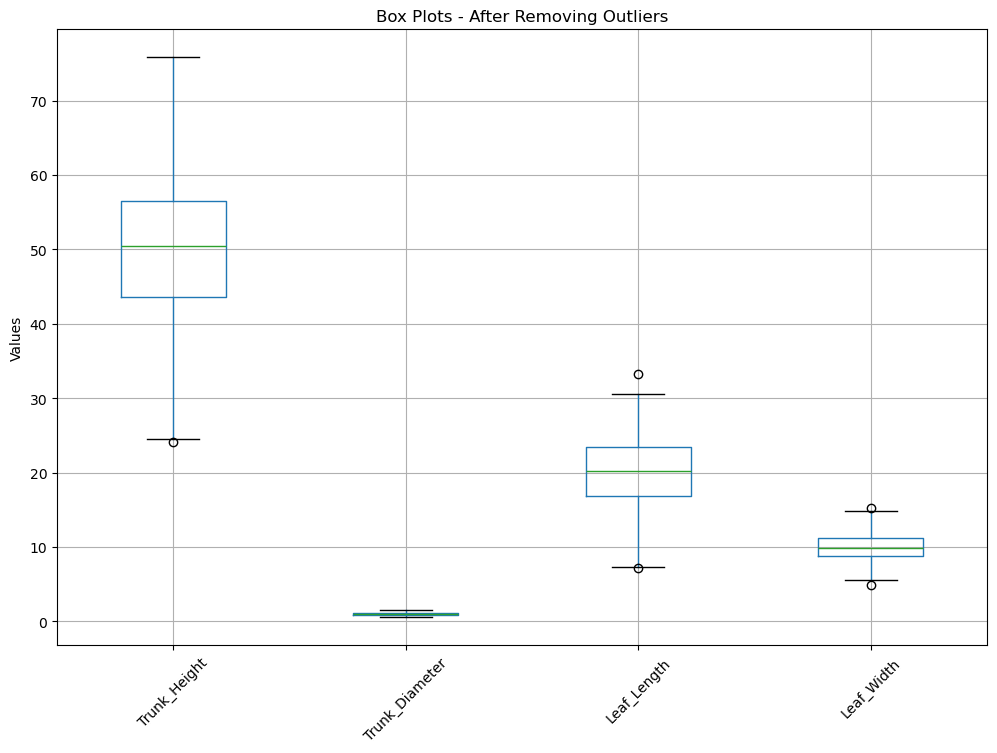

In [12]:
# Box plots after removing outliers
plt.figure(figsize=(12, 8))
amazon_df_no_outliers.boxplot(column=['Trunk_Height', 'Trunk_Diameter', 'Leaf_Length', 'Leaf_Width'])
plt.title('Box Plots - After Removing Outliers')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [13]:
for col in numeric_columns:
    skewness = amazon_df_no_outliers[col].skew()
    print(f"{col}: {skewness:.3f}")

Trunk_Height: 0.032
Trunk_Diameter: 0.045
Leaf_Length: -0.139
Leaf_Width: 0.046
